### Description: This script creates a snapshot of all VHF sources detected by OKLMA between 2119 and 2123 UTC. The time duration is relevant for further analysis performed in Figure 14.

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import glob
import os
import pandas as pd

from pyxlma.lmalib.io import read
from pyxlma.plot.xlma import XlmaPlot
from datetime import datetime
import colorcet as cc
from may19_2013_obs_analysis import cmap_xlma

%matplotlib inline

In [2]:
files_grabbed = sorted(glob.glob(os.path.expanduser('../../data_files/OKLMA_files/L*')))

tfile = sorted(files_grabbed, key=os.path.getctime)[0]

lma_data = pd.DataFrame()

starttime = datetime(2013,5,19,21,19,0)
for i in range(len(files_grabbed)):
    print (sorted(files_grabbed, key=os.path.getctime)[i])
    lma_file = read.lmafile(sorted(files_grabbed, key=os.path.getctime)[(i)])
    if starttime is None:
        starttime = lma_file.starttime
    else:
        starttime = min(lma_file.starttime, starttime)
    # Accounting for empty files
    try:
        lma_data = lma_data.append(lma_file.readfile())
    except:
        pass

print(starttime)

# Station info comes from the last file read.
stations = lma_file.stations

# Will need to add logic to check for existing data and do something else if it is
if lma_data.size>0:
    lma_data.sort_values('Datetime', inplace=True)
    
dttuple = [datetime(2013,5,19,21,19,0), datetime(2013,5,19,21,23,0)]
# dttuple = lma_data.Datetime.min(), lma_data.Datetime.max()
tstring = 'Oklahoma LMA {}-{}'.format(dttuple[0].strftime('%H%M'),
                                      dttuple[1].strftime('%H%M UTC %d %B %Y '))

../../data_files/OKLMA_files/LYLOUT_130519_211000_0600.dat.gz
../../data_files/OKLMA_files/LYLOUT_130519_212000_0600.dat.gz
2013-05-19 21:10:00


In [3]:
# print some basic info on total number of events detected, total number of stations available

N_events = lma_data.shape[0]
N_stations = lma_file.stations.shape[0]
print(N_events, N_stations, lma_file.stations.shape)

1272820 18 (18, 6)


In [4]:
# making sure that we count only those VHF sources which were detected between 2119 and 2123 UTC
# and those VHF sources were detected by at least 7 or more stations in the OKLMA

lma_data1 = lma_data[(lma_data['Datetime'] >= datetime(2013,5,19,21,19,0)) & (lma_data['Datetime'] <= datetime(2013,5,19,21,23,0))]
lma_data1 = lma_data1[lma_data1['Station Count'] >= 7]

/anaconda3/envs/segmentation/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x288 with 0 Axes>

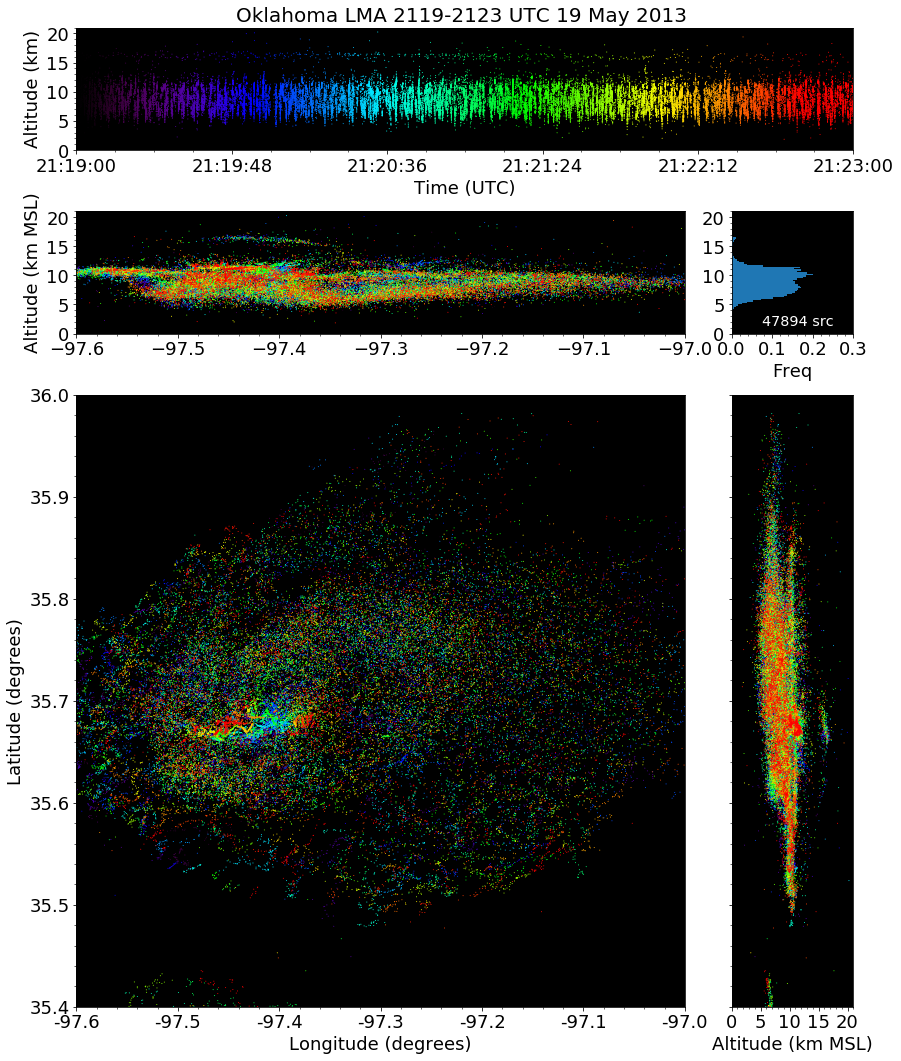

In [5]:
clat, clon = 35.26707931, -97.73839823

#for 2119 to 2123 plot
xlim = [-97.6, -97]
ylim = [35.4, 36]

try:
    del(xp)
except:
    pass

fig = plt.figure()
xp = XlmaPlot(lma_data1,dttuple[0],subplot_labels=False, bkgmap=False,
              readtype='pandas', cmap='xlma', s=1,
              zlim=[0, 21], chi2=1, normed=False,
              tlim=dttuple, xlim=xlim, ylim=ylim, title=tstring,figsize=(13,17))
plt.tight_layout()
plt.show()